# Question 1: Binary Classification Using AdaLine Algorithm


## Task :

<ul>
<li>Part A : Train the Neural Network using AdaLine Algorithm that can seperate irises. Plot the changes in the error ${(t-net)}^{2}/2$.</li>
</ul>


## Adaptive Linear Unit (AdaLine)

<img src="Images/Q2-Adaline.png" width = 500>
<img src="images/learning.png" width = 500>

## Learning Algorithm for AdaLine

<img src="images/learningprocess.png" width = 800>


In [96]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [97]:
# Load the Iris dataset
iris = datasets.load_iris()

# Access the features and target
X = iris.data  # Features
y = iris.target  # Target


### Plotting the Dataset


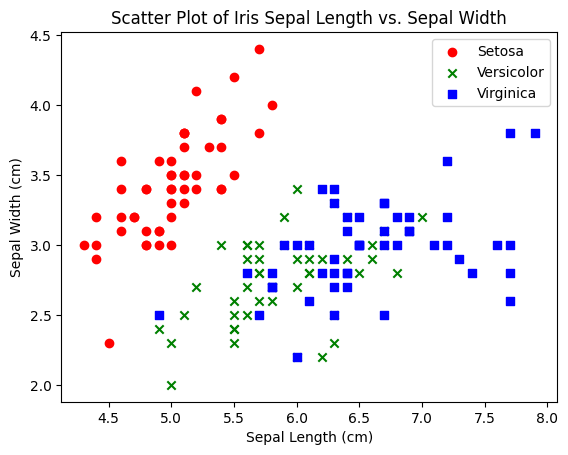

In [98]:
# Create a scatter plot for Sepal length vs. Sepal width
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1],
            label="Setosa", c="r", marker="o")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],
            label="Versicolor", c="g", marker="x")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1],
            label="Virginica", c="b", marker="s")

# Add labels and a legend
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(loc="upper right")

# Show the plot
plt.title("Scatter Plot of Iris Sepal Length vs. Sepal Width")
plt.show()


## 1. Part A


In [99]:
# Using only the first 2 features (Sepal length and Sepal width)
X = iris.data[:100, [0, 1]]
y = iris.target[:100]
y = np.where(y == 0, -1, 1)  # Setosa (-1) and Versicolor (1)


In [100]:

# Adaline class
class Adaline:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.cost = []

        for _ in range(self.n_iterations):
            net = self.net_input(X)
            errors = (y - net)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)

        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        # Identity activation function
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


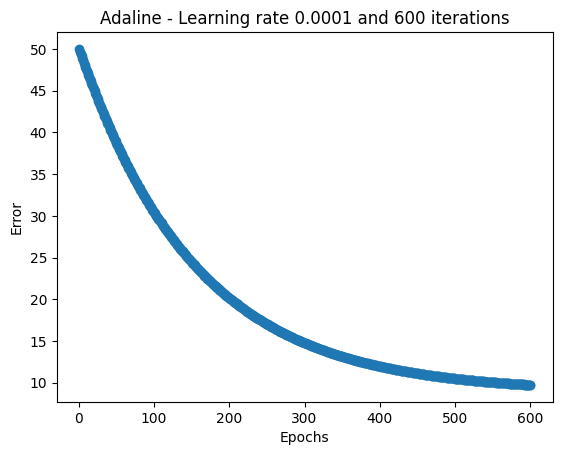

In [101]:
# Initialize and train the Adaline model
learning_rate = 0.0001
n_iterations = 600
adaline = Adaline(learning_rate, n_iterations)

# Fit the model to the training data
adaline.fit(X, y)

# Plot the error after each epoch
plt.plot(range(1, len(adaline.cost) + 1), adaline.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title(
    'Adaline - Learning rate {} and {} iterations'.format(learning_rate, n_iterations))
plt.show()


## 1. Part B


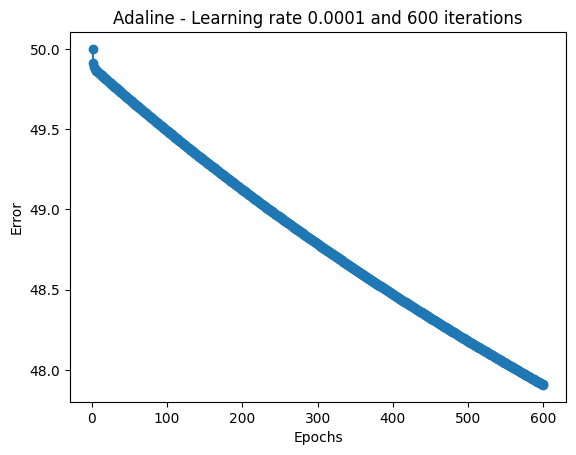

In [102]:
iris = datasets.load_iris()
# Using only the first 2 features (Sepal length and Sepal width)
X = iris.data[50:150, [0, 1]]
y = iris.target[50:150]
y = np.where(y == 1, 1, -1)  # Versicolor (1) and Non-Versicolor (-1)


# Initialize and train the Adaline model
learning_rate = 0.0001
n_iterations = 600
adaline = Adaline(learning_rate, n_iterations)

# Fit the model to the training data
adaline.fit(X, y)

# Plot the error after each epoch
plt.plot(range(1, len(adaline.cost) + 1), adaline.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title(
    'Adaline - Learning rate {} and {} iterations'.format(learning_rate, n_iterations))
plt.show()


### Question: Does `Versicolour` classified betteer than part A or not ?

Answer is NO! - the part A results was better with smooth decreasign rate of error. Here, because of high correlation between features Virginica and Versicolour the seperability between two groups using Adaline which divides into 1 and -1 was impossible.


## Madaline
